In order to successfully complete this assignment we recommend that you participate both individually and in groups during class. **Turn in your assignment using D2L no later than 11:59pm on the day of class.** Grading is based on correctness and completion.

## Put the names of all group members present today below:

Jacob Miller, David Robbins, Haobo.Liu, Kaitlyn Watson, Christian Lulaj

---

# 08 In-Class Assignment: The Kinematics of Robotics

<img src="https://cdn.pixabay.com/photo/2013/07/13/12/04/android-159109__340.png" alt="Cartoon Robot" width=20%>

Image from: https://pixabay.com/images/search/toy%20robot/

Today, we will calculate the forward kinematics of some 3D robots. This means we would like to come up with a set of transformations such that we can know the $x,~y,~z$ coordinates of the end effector with respect to the world coordinate system which is at the base of the robot.  

### Objectives

1. Be able to construct various transformation matrices, including rotation matrices around a given coordinate axis, scaling, reflexion, shear matrices. 
1. Be able to express translation in terms of matrix multiplication (by increasing the vector dimension).
1. Be able to express certain simple robotic motions as compositions of the above transformation matrices.


### Agenda for today's class (80 minutes)
1. [(30 minutes)] Address HW1 questions/misconceptions, Quiz 1 reminders/brief review
1. [(20 minutes) Review Pre-Class Assignment](#Review)
1. [(30 minutes) Robot Kinematics - Pick and Place](#Pick_and_Place)
1. [Odd_Clock](#Odd_Clock) - optional

----
<a name="Pick_and_Place"></a>
## 3. Robot Kinematics - Pick and Place 

Consider the robot depicted in the following image. 

<img alt="Picture of a pick-and-place robot (see text)" src="http://cfnewsads.thomasnet.com/images/large/489/489457.jpg" width="50%">
   
This style of robot is often called a "pick-and-place" robot. 
It has two motors that rotate around the z-axis to move the end effector in the $(x,y)$-plane; one "linear actuator" which moves up-and-down in the $z$-direction; and then finally a third rotating "wrist" joint that turns the "hand" of the robot.
Let's model our robot using the following system diagram:


<img alt="System diagram of pick-and-place robot" src="https://lh4.googleusercontent.com/z5P5JHOmmn3GzXulvHwtqKeLSeUILEHe_9yndHp33gZ1m2mqblR8nmHgNDDzHq3W38jJBdh-Tg=w740" width="35%">

**NOTE:** The origin for this robot is located at the base of the first "tower" and is in-line with the first joint.  The $x$-direction goes from the origin to the right and the $z$-axis goes from the origin upwards. 

This is a little more tricky than the 2D case where everything was rotating around the axis that projects out of the $(x,y)$ plane.  
In 2D we only really worry about one axis of rotation. 
However in 3D we can rotate around any line. 
The following are the 3D transformation matrices that combine rotation around the x, y, or z axes with translations:



## X-Axis rotation

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    z' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    1 & 0 & 0 & dx \\
    0 & \cos(q) & -\sin(q)  & dy \\
    0 & \sin(q) & \cos(q)  & dz \\
    0 & 0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z \\
    1 
 \end{matrix}
\right] 
$$ 



## Y-Axis rotation

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    z' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    \cos(q) & 0 & -\sin(q) & dx \\
    0 & 1 & 0 & dy \\
    \sin(q) & 0 & \cos(q) & dz \\
    0 & 0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z \\
    1 
 \end{matrix}
\right] 
$$ 



## Z-Axis rotation

$$ 
\left[ \begin{matrix}
    x' \\
    y' \\
    z' \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    \cos(q) & -\sin(q) & 0 & dx \\
    \sin(q) & \cos(q) & 0 & dy \\
    0 & 0 & 1 & dz \\
    0 & 0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x \\
    y \\
    z \\
    1 
 \end{matrix}
\right] 
$$ 

### Rotation around an arbitrary axis in $\mathbb R^3$

In fact, in $\mathbb R^3$ we could rotate a body around an arbitrary line. Such a general rotation can we expressed as a composition of rotations and translations (product of matrices) we've already considered. See this link for details:

http://paulbourke.net/geometry/rotate/#:~:text=Rotation%20of%20a%20point%20in%203%20dimensional%20space,the%20rotation%20axis%20passes%20through%20the%20origin%20

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_1$, which represents a coordinate system that is located at the top of the first "tower" (robot's shoulder) and moves by rotating (counterclockwise) around the $z$-axis by $\theta_1$ degrees. Represent your matrix using ```sympy``` and the provided symbols:

In [ ]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

In [ ]:
#Use the following symbols

q1,q2,d4,q4,v1,v2,a1,a2 = sym.symbols('Theta_1, Theta_2, d_4, Theta_4, V_1, V_2,A_1,A_2', negative=False)

In [ ]:
#put your answer here (small hint: use sym.cos and sym.sin)
J_1 = sym.Matrix([[sym.cos(q1), -sym.sin(q1), 0, 0], [sym.sin(q1), sym.cos(q1), 0, 0], [0, 0, 1, v1], [0, 0, 0, 1]])
J_1

⎡cos(Θ₁)  -sin(Θ₁)  0  0 ⎤
⎢                        ⎥
⎢sin(Θ₁)  cos(Θ₁)   0  0 ⎥
⎢                        ⎥
⎢   0        0      1  V₁⎥
⎢                        ⎥
⎣   0        0      0  1 ⎦

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_2$, which represents a coordinate system that is located at the "elbow" joint between the two rotating arms and rotates with the second arm around the $z$-axis by $\theta_2$ degrees. Represent your matrix using ```sympy``` and the symbols provided above:

In [ ]:
J_2 = sym.Matrix([[sym.cos(q2), -sym.sin(q2), 0, a1], [sym.sin(q2), sym.cos(q2), 0, 0], [0, 0, 1, v2], [0, 0, 0, 1]])
J_2

⎡cos(Θ₂)  -sin(Θ₂)  0  A₁⎤
⎢                        ⎥
⎢sin(Θ₂)  cos(Θ₂)   0  0 ⎥
⎢                        ⎥
⎢   0        0      1  V₂⎥
⎢                        ⎥
⎣   0        0      0  1 ⎦

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_3$, which represents a coordinate translation from the "elbow" joint all the way to the horizontal end of the robot arm above the wrist joint.  Note: there is no rotation in this transformation.  Represent your matrix using ```sympy``` and the symbols provided above:

In [ ]:
J_3 = sym.Matrix([[1, 0, 0, a2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
J_3

⎡1  0  0  A₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

**<font color=red>Question:</font>** Construct a joint transformation matrix called $J_4$, which represents a coordinate system that is located at the tip of the robot's "hand" and rotates around the $z$-axis by $\theta_4$. This one is a little different, the configuration is such that the hand touches the table when $d_4=0$ so the translation component for the matrix in the z axis is $d_4-V_1-V_2$. 

In [ ]:
J_4 = sym.Matrix([[sym.cos(q4), -sym.sin(q4), 0, 0], [sym.sin(q4), sym.cos(q4), 0, 0], [0, 0, 1, d4 - v1 - v2], [0, 0, 0, 1]])
J_4

⎡cos(Θ₄)  -sin(Θ₄)  0        0      ⎤
⎢                                   ⎥
⎢sin(Θ₄)  cos(Θ₄)   0        0      ⎥
⎢                                   ⎥
⎢   0        0      1  -V₁ - V₂ + d₄⎥
⎢                                   ⎥
⎣   0        0      0        1      ⎦

**<font color=red>Question:</font>** Rewrite the joint transformation matrices $J_1, J_2, J_3, J_4$ as numpy matrices with discrete (instead of symbolic) values.  Plug in your transformations in the code below and use this to simulate the robot:

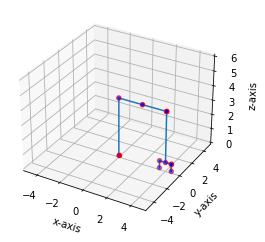

In [ ]:
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D

def Robot_Simulator(theta1=0,theta2=0,d4=0,theta4=0):

    #Convert from degrees to radians
    q1 = theta1/180 * math.pi
    q2 = theta2/180 * math.pi
    q4 = theta4/180 * math.pi

    #Define robot geomitry
    V1 = 4 
    V2 = 0
    A1 = 2 
    A2 = 2 

    #Define your transfomraiton matrices here. 
    J1 = np.matrix([[np.cos(q1), -np.sin(q1), 0, 0 ], 
                    [np.sin(q1), np.cos(q1), 0, 0], 
                    [0, 0, 1, V1],
                    [0, 0, 0, 1]])

    J2 = np.matrix([[np.cos(q2), -np.sin(q2), 0, A1 ], 
                    [np.sin(q2), np.cos(q2), 0, 0 ], 
                    [0, 0, 1, V2],
                    [0, 0, 0, 1]])

    J3 = np.matrix([[1, 0, 0, A2 ], 
                    [0, 1, 0, 0 ], 
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])

    J4 = np.matrix([[np.cos(q4), -np.sin(q4), 0, 0], 
                    [np.sin(q4), np.cos(q4), 0, 0], 
                    [0, 0, 1, d4 - V1 - V2],
                    [0, 0, 0, 1]])

    
    #Make the rigid end effector
    p = np.matrix([[-0.5,0,0, 1], [-0.5,0,0.5,1], [0.5,0,0.5, 1], [0.5,0,0,1],[0.5,0,0.5, 1], [0,0,0.5,1], [0,0,V1+V2,1]]).T
    
    #Propogate and add joint points though the simulation
    p = np.concatenate((J4*p, np.matrix([0,0,0,1]).T), axis=1 )
    p = np.concatenate((J3*p, np.matrix([0,0,0,1]).T), axis=1 )
    p = np.concatenate((J2*p, np.matrix([0,0,0,1]).T), axis=1 )
    p = np.concatenate((J1*p, np.matrix([0,0,0,1]).T), axis=1 )
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(p[0,:].tolist()[0],(p[1,:]).tolist()[0], (p[2,:]).tolist()[0], s=20, facecolors='blue', edgecolors='r')
    ax.scatter(0,0,0, s=20, facecolors='r', edgecolors='r')
    ax.plot(p[0,:].tolist()[0],(p[1,:]).tolist()[0], (p[2,:]).tolist()[0])
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])
    ax.set_zlim([0,6])
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')    
    ax.set_zlabel('z-axis') 

    plt.show()
    
target = interact(Robot_Simulator, theta1=(-180,180), theta2=(-180,180), d4=(0,6), theta4=(-180,180)); ##TODO: Modify this line of code

&#9989; **<font color=red>Question:</font>** Can we change the order of the transformation matrices? Why? You can try and see what happens.


No, we cannot change the order of the matrices. As we have learned before, matrix multiplication is not communative and therefore order matters. When we try it, it messes everything up.

----
<a name="Odd_Clock"></a>
## 4. Odd Clock - Optional

This part of the assignment is completely optional and will not be graded. You can complete it for fun, if you have time.

Consider the clock depicted in the following image. 

<img alt="Picture of an 'odd clock' with the minute hand attached to the end of the hour hand" src="https://hackaday.com/wp-content/uploads/2015/05/hihclock.jpg" width=80%>

from: [Hackaday](https://hackaday.com/2015/05/26/odd-clock-moves-minute-hand-to-hour-hand/)


Instead of a standard clock--which has independent hour and minute hands--this clock connects the minute hand at the end of the hour hand. Here is a video showing the sped-up clock motion: 

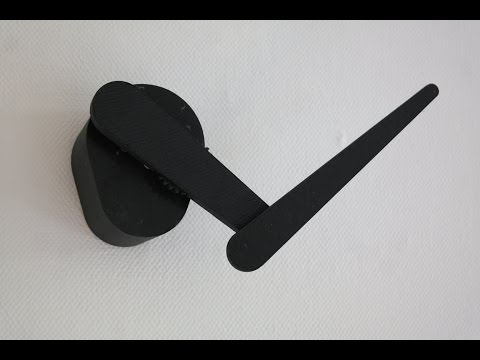

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("bowLiSlm_gA",width=640,height=360, mute=1)

The following code is an animated traditional clock which uses the function as a trick to animate things in jupyter:

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from IPython.display import display, clear_output
import time
def show_animation(delay=0.01):
    fig = plt.gcf();
    time.sleep(delay)       # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

Lets see a standard analog clock run at high speed

In [ ]:
import numpy as np
'''
Analog clock plotter with time input as seconds
'''
def analog_clock(tm=0):

    #Convert from time to radians
    a_minutes = -tm/(60*60) * np.pi * 2
    a_hours = -tm/(60*60*12) * np.pi * 2

    #Define clock hand sizees
    d_minutes = 4
    d_hours = 3 
    arrow_width=0.5
    arrow_length=1

    # Set up figure
    fig = plt.gcf()
    ax = fig.gca();
    ax.set_xlim([-15,15]);
    ax.set_ylim([-10,10]);
    ax.scatter(0,0, s=15000, color="navy"); #Background Circle
    plt.axis('off');
        
    # Calculation Minute hand transformation matrix
    J2 = np.matrix([[np.cos(a_minutes), -np.sin(a_minutes)], 
                    [np.sin(a_minutes), np.cos(a_minutes)]] )
    pm = np.matrix([[0,d_minutes], [-arrow_width,d_minutes], [0,arrow_length+d_minutes], [arrow_width,d_minutes], [0,d_minutes]] ).T;
    pm = np.concatenate((J2*pm, np.matrix([0,0]).T), axis=1 );
    ax.plot(pm[0,:].tolist()[0],(pm[1,:]).tolist()[0], color='cyan', linewidth=2);

    # Calculation Hour hand transformation matrix    
    J1 = np.matrix([[np.cos(a_hours), -np.sin(a_hours)], 
                    [np.sin(a_hours), np.cos(a_hours)]] )
    ph = np.matrix([[0,d_hours], [0,d_hours], [-arrow_width,d_hours], [0,arrow_length+d_hours], [arrow_width,d_hours], [0,d_hours]]).T;
    ph = np.concatenate((J1*ph, np.matrix([0,0]).T), axis=1 );
    ax.plot(ph[0,:].tolist()[0],(ph[1,:]).tolist()[0], color='yellow', linewidth=2);

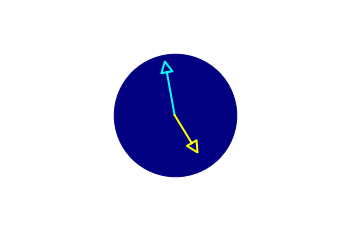

<Figure size 432x288 with 0 Axes>

In [ ]:
#Run the clock for about 5 hours at 100 times speed so we can see the hands move
for tm in range(0,60*60*5, 100):
    analog_clock(tm);
    show_animation();

For the following few questions, consider the transformation matrix $J_1$ redefined below with an angle of 5 hours out of 12. 

In [ ]:
import sympy as sym
import numpy as np
sym.init_printing(use_unicode=True)

a_hours = 5/12 * 2 * np.pi
J1 = np.matrix([[np.cos(a_hours), -np.sin(a_hours)], 
                [np.sin(a_hours), np.cos(a_hours)]] )

sym.Matrix(J1)

⎡-0.866025403784439         -0.5       ⎤
⎢                                      ⎥
⎣       0.5          -0.866025403784439⎦

&#9989; **<font color=red>Question:</font>**  Using code, show that the transpose of $J_1$ is also the inverse of $J_1$, then explain how the code demonstrates the answer. 

In [ ]:
#Put your answer here

I_1=J1*J1.T
I_2=J1.T*J1

print(I_1)
print(I_2)

[[1.00000000e+00 7.43708407e-18]
 [7.43708407e-18 1.00000000e+00]]
[[ 1.00000000e+00 -7.43708407e-18]
 [-7.43708407e-18  1.00000000e+00]]


We know that any matrix times it inverse should equal the identity matrix. The above .T function used on the J1 matrix transposes the matrix. When we multiply the J1 matrix by its transpose matrix we get the identity matrix back. We do this in a different order as well and get the identity matrix again. Therefore the transpose of J1 is also the inverse of J1

&#9989; **<font color=red>Question:</font>**  Given the trigonometric identity $\cos^2(\theta) + \sin^2(\theta) = 1$, prove by construction--using either Python or $\LaTeX$/```Markdown``` or ```sympy``` (if you are feeling adventurous)--that the transpose of the $J_1$ matrix is also the inverse for ANY angle ```a_hours``` $\in [0, 2\pi]$. *Note: You may want to work this out on paper with your group, and then type up the proof on your own after class.*

**Put your proof here.**

Now consider the following code which attempts to connect the hands on the clock together to make the Odd Clock shown in the video above.

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
from IPython.display import display, clear_output
import time
def show_animation(delay=0.01):
    fig = plt.gcf();
    time.sleep(delay)       # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

In [ ]:
import numpy as np

def odd_clock(tm=0):

    #Convert from time to radians
    a_seconds = -tm/60 * np.pi * 2
    a_minutes = -tm/(60*60) * np.pi * 2
    a_hours = -tm/(60*60*12) * np.pi * 2

    #Define robot geomitry
    #d_seconds = 2.5  
    d_minutes = 2
    d_hours = 1.5 
    arrow_width=0.5
    arrow_length=1

    # Set up figure
    fig = plt.gcf()
    ax = fig.gca();
    ax.set_xlim([-15,15]);
    ax.set_ylim([-10,10]);
    plt.axis('off');
    
    #Define the arrow at the end of the last hand 
    #p = np.matrix([[0,d_minutes,1], [0,0,1]]).T
    p = np.matrix([[0,d_minutes,1], [-arrow_width,d_minutes,1], [0,arrow_length+d_minutes,1], 
                   [arrow_width,d_minutes,1 ], [0,d_minutes,1 ], [0,0,1]] ).T;
    
    # Calculation Second hand transformation matrix     
    J3 = np.matrix([[np.cos(a_seconds), -np.sin(a_seconds), 0 ], 
                    [np.sin(a_seconds), np.cos(a_seconds), d_minutes ], 
                    [0, 0, 1]])
    p = np.concatenate((J3*p, np.matrix([0,0,1]).T), axis=1 )

    J2 = np.matrix([[np.cos(a_minutes), -np.sin(a_minutes), 0 ], 
                    [np.sin(a_minutes), np.cos(a_minutes), d_hours ], 
                    [0, 0, 1]])
    p = np.concatenate((J2*p, np.matrix([0,0,1]).T), axis=1 )
    
    J1 = np.matrix([[np.cos(a_hours), -np.sin(a_hours), 0 ], 
                    [np.sin(a_hours), np.cos(a_hours), 0 ], 
                    [0, 0, 1]])
    p = np.concatenate((J1*p, np.matrix([0,0,1]).T), axis=1 )

    ax.scatter(0,0, s=20, facecolors='r', edgecolors='r')
    ax.plot(p[0,:].tolist()[0],(p[1,:]).tolist()[0])


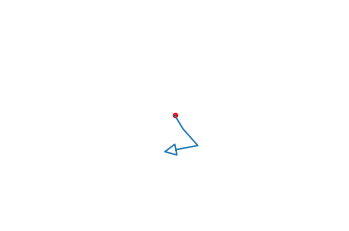

<Figure size 432x288 with 0 Axes>

In [ ]:
#Run the clock for about 5 hours at 100 times speed so we can see the hands move
for tm in range(0,60*60*5, 100):
    odd_clock(tm);
    show_animation();

&#9989; **<font color=red>Question:</font>** Using the given point ($p$) written in "minutes" coordinates (**on line 26 of the above code**) and the above transformation matrices ($J_1,J_2$), write down the equation to transform $p$ into world coordinates $p_w$.

**Put the answer to the above question here.**

$p_w = J_1 * J_2 * p_e$

&#9989; **<font color=red>Question:</font>** Notice the above ```odd_clock``` function has variables ```d_seconds``` and ```a_seconds``` commented out.  Use these variables and modify the above code to add a "seconds" hand on the tip of the minute hand such that the seconds hand moves around the minute hand just like the minute hand moves around the hour hand. If you have trouble, use the following cell to explain your thought process and where you are getting stuck.

**Explain your thought process here, and if applicable, where you are getting stuck.**

We figured it just had to be a new matrix with transformation using the a_seconds variable, and then we translated it to be on the end of the minutes hand.

----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

-----
### Congratulations, we're done!


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eddc04b2-32a0-43fc-87cf-17e6670be569' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>